In [1]:
import numpy as np
import math
import csv
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statistics as stat
import csv

## Read in challenge data

In [2]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/Data/DREAM6_ExPred_Promoters.fasta","r") as file:
    # parse training promoter data
    training_seq_IDs=[]
    training_seqs=[]
    
    while True:
        seq_ID=file.readline()
        seq=file.readline()
        
        if(seq_ID == "" or seq == ""):
            break
        
        training_seq_IDs.append(seq_ID[1:-1])
        training_seqs.append(seq[:-1])

In [3]:
print(training_seq_IDs)

['RPL10', 'RPL11B', 'RPL12A', 'RPL13A', 'RPL13B', 'RPL14A', 'RPL14B', 'RPL15A', 'RPL15B', 'RPL16B', 'RPL17A', 'RPL18A', 'RPL18B', 'RPL19B', 'RPL1A', 'RPL1B', 'RPL20A', 'RPL20B', 'RPL22A', 'RPL22B', 'RPL23A', 'RPL23B', 'RPL25', 'RPL27A', 'RPL27B', 'RPL2A', 'RPL3', 'RPL30', 'RPL31A', 'RPL33A', 'RPL33B', 'RPL34B', 'RPL35A', 'RPL36A', 'RPL36B', 'RPL38', 'RPL39', 'RPL40A', 'RPL40B', 'RPL41A', 'RPL41B', 'RPL42B', 'RPL43A', 'RPL43B', 'RPL4A', 'RPL4B', 'RPL5', 'RPL6B', 'RPL7A', 'RPL7B', 'RPL8A', 'RPL8B', 'RPP0', 'RPP1A', 'RPP1B', 'RPP2A', 'RPS0B', 'RPS10A', 'RPS11A', 'RPS11B', 'RPS12', 'RPS13', 'RPS14A', 'RPS14B', 'RPS16A', 'RPS16B', 'RPS18A', 'RPS18B', 'RPS19A', 'RPS1A', 'RPS1B', 'RPS2', 'RPS20', 'RPS21A', 'RPS21B', 'RPS23A', 'RPS23B', 'RPS24A', 'RPS24B', 'RPS27A', 'RPS27B', 'RPS28B', 'RPS3', 'RPS4A', 'RPS4B', 'RPS6A', 'RPS6B', 'RPS7A', 'RPS7B', 'RPS9A']


In [4]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/Data/DREAM6_ExPred_PromoterActivities.txt","r") as file:
    # parse training promoter activity data
    file=csv.reader(file, delimiter="\t")
    training_activities=[]
    
    for row in file:
        training_activities.append(float(row[1]))

In [5]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/Data/DREAM6_ExPred_TestSetPromoters.fasta","r") as file:
    # parse test promoter data 
    test_seq_IDs=[]
    test_seqs=[]
    
    while True:
        seq_ID=file.readline()
        seq=file.readline()
        
        if(seq_ID == "" or seq == ""):
            break
            
        test_seq_IDs.append(seq_ID[1:-1])
        test_seqs.append(seq[:-1])

## Read in motifs from public databases

In [6]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/Data/EPD_data_oneline.fasta","r") as file:
    # parse EPD promoter data
    EPD_seq_IDs=[]
    EPD_seqs=[]
    
    #print(file.readline())
    #print(file.readline())
    
    while True:
        seq_ID=file.readline()
        seq=file.readline()
        
        if(seq_ID==""  or seq==""):
            break
        
        EPD_seq_IDs.append(seq_ID[1:-1])
        EPD_seqs.append(seq[:-1])
        
        #file.readline()

In [7]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/Data/S. Cerevisiae PWMs/PFM/morozov.RAP1",'r') as file:
    # parse Rap1 motif PWM from ScerTF database
    ScerTF_Rap1_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        data=data[2:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
            
        ScerTF_Rap1_pwm.append(data)

In [8]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/Data/S. Cerevisiae PWMs/PFM/macisaac.ABF1",'r') as file:
    # parse Abf1 motif PWM from ScerTF database
    ScerTF_Abf1_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        data=data[2:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
            
        ScerTF_Abf1_pwm.append(data)

In [9]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/Data/S. Cerevisiae PWMs/PFM/zhu.FHL1",'r') as file:
    # parse Fhl1 motif PWM from ScerTF database
    ScerTF_Fhl1_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        data=data[2:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
            
        ScerTF_Fhl1_pwm.append(data)

In [10]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/Data/S. Cerevisiae PWMs/PFM/zhu.SFP1",'r') as file:
    # parse Sfp1 motif PWM from ScerTF database
    ScerTF_Sfp1_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        data=data[2:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
            
        ScerTF_Sfp1_pwm.append(data)

In [11]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/Data/S. Cerevisiae PWMs/PFM/badis.REB1",'r') as file:
    # parse Reb1 motif PWM from ScerTF database
    ScerTF_Reb1_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        data=data[2:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
            
        ScerTF_Reb1_pwm.append(data)

## Read in motifs from motif-finding algorithms

In [12]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/BioProspector/out/motif-1.txt","r") as file:
    # parse top motif PWM from BioProspector calc from DREAM test promoters
    BioProsp_motif1_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        for i in range(0,len(data)):
            data[i]=float(data[i])/100
            
        BioProsp_motif1_pwm.append(data)
    
    BioProsp_motif1_pwm=np.array(BioProsp_motif1_pwm)
    BioProsp_motif1_pwm=BioProsp_motif1_pwm.T
    BioProsp_motif1_pwm=BioProsp_motif1_pwm.tolist()

In [13]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/BioProspector/out/motif-2.txt","r") as file:
    # parse top motif PWM from BioProspector calc from DREAM test promoters
    BioProsp_motif2_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        for i in range(0,len(data)):
            data[i]=float(data[i])/100
            
        BioProsp_motif2_pwm.append(data)
    
    BioProsp_motif2_pwm=np.array(BioProsp_motif2_pwm)
    BioProsp_motif2_pwm=BioProsp_motif2_pwm.T
    BioProsp_motif2_pwm=BioProsp_motif2_pwm.tolist()

In [14]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/BioProspector/out/motif-3.txt","r") as file:
    # parse top motif PWM from BioProspector calc from DREAM test promoters
    BioProsp_motif3_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        for i in range(0,len(data)):
            data[i]=float(data[i])/100
            
        BioProsp_motif3_pwm.append(data)
    
    BioProsp_motif3_pwm=np.array(BioProsp_motif3_pwm)
    BioProsp_motif3_pwm=BioProsp_motif3_pwm.T
    BioProsp_motif3_pwm=BioProsp_motif3_pwm.tolist()

In [15]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/BioProspector/out/motif-4.txt","r") as file:
    # parse top motif PWM from BioProspector calc from DREAM test promoters
    BioProsp_motif4_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        for i in range(0,len(data)):
            data[i]=float(data[i])/100
            
        BioProsp_motif4_pwm.append(data)
    
    BioProsp_motif4_pwm=np.array(BioProsp_motif4_pwm)
    BioProsp_motif4_pwm=BioProsp_motif4_pwm.T
    BioProsp_motif4_pwm=BioProsp_motif4_pwm.tolist()

In [16]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/BioProspector/out/motif-5.txt","r") as file:
    # parse top motif PWM from BioProspector calc from DREAM test promoters
    BioProsp_motif5_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        for i in range(0,len(data)):
            data[i]=float(data[i])/100
            
        BioProsp_motif5_pwm.append(data)
    
    BioProsp_motif5_pwm=np.array(BioProsp_motif5_pwm)
    BioProsp_motif5_pwm=BioProsp_motif5_pwm.T
    BioProsp_motif5_pwm=BioProsp_motif5_pwm.tolist()

In [17]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/MEME/meme-5.0.4/motif1_DREAM_pwd.txt","r") as file:
    # parse length 15 motif1/5 PWM from MEME calc from DREAM test promoters
    MEME_motif1_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        data=data[:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
        
        MEME_motif1_pwm.append(data)
    
    MEME_motif1_pwm=np.array(MEME_motif1_pwm)
    MEME_motif1_pwm=MEME_motif1_pwm.T
    MEME_motif1_pwm=MEME_motif1_pwm.tolist()

In [18]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/MEME/meme-5.0.4/motif2_DREAM_pwd.txt","r") as file:
    # parse length 15 motif2/5 PWM from MEME calc from DREAM test promoters
    MEME_motif2_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        data=data[:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
        
        MEME_motif2_pwm.append(data)
    
    MEME_motif2_pwm=np.array(MEME_motif2_pwm)
    MEME_motif2_pwm=MEME_motif2_pwm.T
    MEME_motif2_pwm=MEME_motif2_pwm.tolist()

In [19]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/MEME/meme-5.0.4/motif3_DREAM_pwd.txt","r") as file:
    # parse length 15 motif3/5 PWM from MEME calc from DREAM test promoters
    MEME_motif3_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        data=data[:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
        
        MEME_motif3_pwm.append(data)
    
    MEME_motif3_pwm=np.array(MEME_motif3_pwm)
    MEME_motif3_pwm=MEME_motif3_pwm.T
    MEME_motif3_pwm=MEME_motif3_pwm.tolist()

In [20]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/MEME/meme-5.0.4/motif4_DREAM_pwd.txt","r") as file:
    # parse length 15 motif4/5 PWM from MEME calc from DREAM test promoters
    MEME_motif4_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        data=data[:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
        
        MEME_motif4_pwm.append(data)
    
    MEME_motif4_pwm=np.array(MEME_motif4_pwm)
    MEME_motif4_pwm=MEME_motif4_pwm.T
    MEME_motif4_pwm=MEME_motif4_pwm.tolist()

In [21]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/MEME/meme-5.0.4/motif5_DREAM_pwd.txt","r") as file:
    # parse length 15 motif5/5 PWM from MEME calc from DREAM test promoters
    MEME_motif5_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        data=data[:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
        
        MEME_motif5_pwm.append(data)
    
    MEME_motif5_pwm=np.array(MEME_motif5_pwm)
    MEME_motif5_pwm=MEME_motif5_pwm.T
    MEME_motif5_pwm=MEME_motif5_pwm.tolist()

In [22]:
with open("/Users/teianoel/Desktop/Bioinfo_225/Final_Project/MEME/meme-5.0.4/motif1_EPD_pwd.txt","r") as file:
    # parse length 15 motif PWM from MEME calc from EPD promoters
    MEME_EPD_motif1_pwm=[]
    
    while True:
        data=file.readline()
        
        if(data==""):
            break
        
        data=data.split(" ")
        
        data=data[:-1]
        
        for i in range(0,len(data)):
            data[i]=float(data[i])
        
        MEME_EPD_motif1_pwm.append(data)
    
    MEME_EPD_motif1_pwm=np.array(MEME_EPD_motif1_pwm)
    MEME_EPD_motif1_pwm=MEME_EPD_motif1_pwm.T
    MEME_EPD_motif1_pwm=MEME_EPD_motif1_pwm.tolist() 

## Feature generation

In [23]:
def reverse_complement(seq):
    reverse=""
    for i in range(0,len(seq)):
        if (seq[i]=='A'):
            reverse=reverse+'T'
        elif (seq[i]=='T'):
            reverse=reverse+'A'
        elif (seq[i]=='C'):
            reverse=reverse+'G'
        else:
            reverse=reverse+'C'
    return(reverse[::-1])

In [24]:
pwm_test=[[0.3,0.6,0.1,0.0,0.0,0.4,0.7,0.1,0.1],[0.4,0.1,0.0,0.0,0.0,0.1,0.1,0.1,0.2],[0.2,0.2,0.8,1.0,0.0,0.4,0.1,0.8,0.2],[0.1,0.1,0.1,0.0,1.0,0.1,0.1,0.0,0.5]]
print(pwm_test)
kmer_test="CAGGTAAGT"

[[0.3, 0.6, 0.1, 0.0, 0.0, 0.4, 0.7, 0.1, 0.1], [0.4, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2], [0.2, 0.2, 0.8, 1.0, 0.0, 0.4, 0.1, 0.8, 0.2], [0.1, 0.1, 0.1, 0.0, 1.0, 0.1, 0.1, 0.0, 0.5]]


In [25]:
# Takes in a kmer of a dna seq to be scored and pwm of motif
# Returns log-odds score of kmer against background prob(assumed uniform dist for nucs)
def score_kmer(kmer,pwm):
    p_actual = 0
    p_background = 0
    
    for i in range(0,len(kmer)):
        if (kmer[i]=='A'):
            if (pwm[0][i]!=0):
                p_actual=p_actual+math.log2(pwm[0][i])
        elif (kmer[i]=='C'):
            if (pwm[1][i]!=0):
                p_actual=p_actual+math.log2(pwm[1][i])
        elif (kmer[i]=='G'):
            if (pwm[2][i]!=0):
                p_actual=p_actual+math.log2(pwm[2][i])
        else:
            if (pwm[3][i]!=0):
                p_actual=p_actual+math.log2(pwm[3][i])
        p_background=p_background+math.log2(0.25)
    
    log_odds=p_actual-p_background
    return(log_odds)           

In [26]:
score_test=score_kmer(kmer_test,pwm_test)
print(score_test)

12.460748853454586


In [27]:
# Takes in a dna seq to score, length of motif for scoring, k, and pwm of motif
# Returns max log-odds score of all kmers in seq against background prob
def score_seq(seq,k,pwm):
    scores=[]
    
    for i in range(0,len(seq)-k+1):
        kmer=seq[i:i+k]
        scores.append(score_kmer(kmer,pwm))
    
    max_score=max(scores)
    return(max_score)

In [28]:
# Takes in a dna seq to score, length of motif for scoring, k, and pwm of motif
# Returns position of max log-odds score of all kmers in seq against background prob
def max_pos(seq,k,pwm):
    scores=[]
    
    for i in range(0,len(seq)-k+1):
        kmer=seq[i:i+k]
        scores.append(score_kmer(kmer,pwm))
    
    max_score=max(scores)
    scores=np.array(scores)
    max_pos=np.where(scores==max_score)[0][0]
    return(max_pos)

In [29]:
def countPairs(codon,seq):
    count=0
    codon_seq=[seq[i:i+2] for i in range(0,len(seq),2)]
    for c in codon_seq:
        if c==codon:
            count+=1
    return(count)

In [30]:
# Feature: scores of training promoters based on ScerTF Rap1 motif pwm
ScerTF_Rap1_scores=[]
k_ScerTF_Rap1=len(ScerTF_Rap1_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_ScerTF_Rap1,ScerTF_Rap1_pwm)
    ScerTF_Rap1_scores.append(score)

In [31]:
# Feature: scores of training promoters based on ScerTF Abf1 motif pwm
ScerTF_Abf1_scores=[]
k_ScerTF_Abf1=len(ScerTF_Abf1_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_ScerTF_Abf1,ScerTF_Abf1_pwm)
    ScerTF_Abf1_scores.append(score)

In [32]:
# Feature: scores of training promoters based on ScerTF Fhl1 motif pwm
ScerTF_Fhl1_scores=[]
k_ScerTF_Fhl1=len(ScerTF_Fhl1_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_ScerTF_Fhl1,ScerTF_Fhl1_pwm)
    ScerTF_Fhl1_scores.append(score)

In [33]:
# Feature: scores of training promoters based on ScerTF Sfp1 motif pwm
ScerTF_Sfp1_scores=[]
k_ScerTF_Sfp1=len(ScerTF_Sfp1_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_ScerTF_Sfp1,ScerTF_Sfp1_pwm)
    ScerTF_Sfp1_scores.append(score)

In [34]:
# Feature: scores of training promoters based on ScerTF Reb1 motif pwm
ScerTF_Reb1_scores=[]
k_ScerTF_Reb1=len(ScerTF_Reb1_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_ScerTF_Reb1,ScerTF_Reb1_pwm)
    ScerTF_Reb1_scores.append(score)

In [35]:
# Feature: scores of training promoters based on BioProspector motif1 pwm
BioProsp_motif1_scores=[]
k_BioProsp_motif1=len(BioProsp_motif1_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_BioProsp_motif1,BioProsp_motif1_pwm)
    BioProsp_motif1_scores.append(score)

In [36]:
# Feature: scores of training promoters based on BioProspector motif2 pwm
BioProsp_motif2_scores=[]
k_BioProsp_motif2=len(BioProsp_motif2_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_BioProsp_motif2,BioProsp_motif2_pwm)
    BioProsp_motif2_scores.append(score)

In [37]:
# Feature: scores of training promoters based on BioProspector motif3 pwm
BioProsp_motif3_scores=[]
k_BioProsp_motif3=len(BioProsp_motif3_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_BioProsp_motif3,BioProsp_motif3_pwm)
    BioProsp_motif3_scores.append(score)

In [38]:
# Feature: scores of training promoters based on BioProspector motif4 pwm
BioProsp_motif4_scores=[]
k_BioProsp_motif4=len(BioProsp_motif4_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_BioProsp_motif4,BioProsp_motif4_pwm)
    BioProsp_motif4_scores.append(score)

In [39]:
# Feature: scores of training promoters based on BioProspector motif5 pwm
BioProsp_motif5_scores=[]
k_BioProsp_motif5=len(BioProsp_motif5_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_BioProsp_motif5,BioProsp_motif5_pwm)
    BioProsp_motif5_scores.append(score)

In [40]:
# Feature: scores of training promoters based on MEME motif1 pwm derived from DREAM !!training!! promoters
MEME_motif1_scores=[]
k_MEME_motif1=len(MEME_motif1_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_MEME_motif1,MEME_motif1_pwm)
    MEME_motif1_scores.append(score)

In [41]:
# Feature: scores of training promoters based on MEME motif2 pwm derived from DREAM promoters
MEME_motif2_scores=[]
k_MEME_motif2=len(MEME_motif2_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_MEME_motif2,MEME_motif2_pwm)
    MEME_motif2_scores.append(score)

In [42]:
# Feature: scores of training promoters based on MEME motif3 pwm derived from DREAM promoters
MEME_motif3_scores=[]
k_MEME_motif3=len(MEME_motif3_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_MEME_motif3,MEME_motif3_pwm)
    MEME_motif3_scores.append(score)

In [43]:
# Feature: scores of training promoters based on MEME motif4 pwm derived from DREAM promoters
MEME_motif4_scores=[]
k_MEME_motif4=len(MEME_motif4_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_MEME_motif4,MEME_motif4_pwm)
    MEME_motif4_scores.append(score)

In [44]:
# Feature: scores of training promoters based on MEME motif5 pwm derived from DREAM promoters
MEME_motif5_scores=[]
k_MEME_motif5=len(MEME_motif5_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_MEME_motif5,MEME_motif5_pwm)
    MEME_motif5_scores.append(score)

In [45]:
# Feature: scores of training promoters based on MEME motif1 pwm derived from EPD promoters
MEME_EPD_motif1_scores=[]
k_MEME_EPD_motif1=len(MEME_EPD_motif1_pwm[0])
for promoter in training_seqs:
    score=score_seq(promoter,k_MEME_EPD_motif1,MEME_EPD_motif1_pwm)
    MEME_EPD_motif1_scores.append(score)

In [46]:
# Feature: lengths of promoter sequences
promoter_lengths=[]
for promoter in training_seqs:
    length=len(promoter)
    promoter_lengths.append(length)

In [47]:
# Feature: number of CpG islands
CpG_counts=[]
promoter=training_seqs[2]
above_50=False

for promoter in training_seqs:
    CpG_count=0
    for i in range(0,len(promoter)-200+1):
        k_mer=promoter[i:i+200]
        k_mer=list(k_mer)
        GC_count=k_mer.count('C')+k_mer.count('G')
        GC_freq=GC_count/200
        if(GC_freq>0.5 and above_50==False):
            above_50=True
            CpG_count=CpG_count+1
        if(GC_freq<0.5 and above_50==True):
            above_50=False
    CpG_counts.append(CpG_count)

print(CpG_counts)  
CpG_counts=np.array(CpG_counts)
np.where(CpG_counts==6)

[0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 1, 4, 0, 0, 0, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 6, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1]


(array([77]),)

In [48]:
# Feature: number of CpG islands: obs/exp ratio criterion added
CpG_counts=[]
promoter=training_seqs[2]
above=False

for promoter in training_seqs:
    CpG_count=0
    for i in range(0,len(promoter)-200+1):
        k_mer=promoter[i:i+200]
        k_mer_list=list(k_mer)
        GC_count=k_mer_list.count('C')+k_mer_list.count('G')
        GC_freq=GC_count/200
        obs=countPairs("CG",k_mer)  # should k_mer be list?
        exp=(k_mer_list.count('C')*k_mer_list.count('G'))/200
        obs2exp=obs/exp
        
        if(GC_freq>0.5 and obs2exp>0.6 and above==False):
            above=True
            CpG_count=CpG_count+1
        if(GC_freq<0.5 or obs2exp<0.6 and above==True):
            above=False
            
    CpG_counts.append(CpG_count)
print(CpG_counts)

[0, 0, 26, 0, 5, 14, 0, 0, 48, 0, 14, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 1, 9, 0, 0, 0, 0, 40, 0, 14, 0, 0, 0, 0, 41, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 26, 46, 17, 15, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 3, 0, 18, 0, 6, 0, 56]


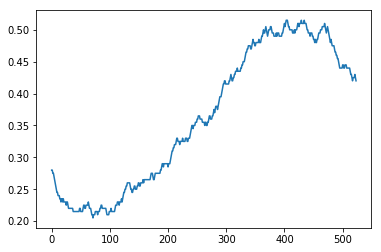

723

In [49]:
promoter=training_seqs[77]
above_50=False
CpG_count=0
x=[]
for i in range(0,len(promoter)-200+1):
    k_mer=promoter[i:i+200]
    k_mer=list(k_mer)
    GC_count=k_mer.count('C')+k_mer.count('G')
    GC_freq=GC_count/200
    if(GC_freq>0.5 and above_50==False):
        above_50=True
        CpG_count=CpG_count+1
    if(GC_freq<0.5 and above_50==True):
        above_50=False
    x.append(GC_freq)


plt.plot(x)
plt.show()
len(promoter)

In [50]:
# Feature: max GC freq/200 bp
GC_max_freqs=[]
#CpG_count=0

for promoter in training_seqs:
    GC_max_freq=-1
    for i in range(0,len(promoter)-200+1):
        k_mer=promoter[i:i+200]
        k_mer=list(k_mer)
        GC_count=k_mer.count('C')+k_mer.count('G')
        GC_freq=GC_count/200
        if(GC_freq>GC_max_freq):
            GC_max_freq=GC_freq
    GC_max_freqs.append(GC_max_freq) 

In [51]:
# Feature: max obs2exp
obs2exp_max=[]

for promoter in training_seqs:
    max_rat=-1
    for i in range(0,len(promoter)-200+1):
        k_mer=promoter[i:i+200]
        k_mer_list=list(k_mer)
        obs=countPairs("CG",k_mer)  # should k_mer be list?
        exp=(k_mer_list.count('C')*k_mer_list.count('G'))/200
        obs2exp=obs/exp
        if(obs2exp>max_rat):
            max_rat=obs2exp
    obs2exp_max.append(max_rat) 

In [52]:
# Feature: total GC content
GC_content=[]

for promoter in training_seqs:
    GC_count=promoter.count('C')+promoter.count('G')
    GC_freq=GC_count/len(promoter)
    GC_content.append(GC_freq)

In [53]:
# Feature: motif positions

ScerTF_pwms=[]
ScerTF_pwms.append(ScerTF_Rap1_pwm)
ScerTF_pwms.append(ScerTF_Abf1_pwm)
ScerTF_pwms.append(ScerTF_Fhl1_pwm)
ScerTF_pwms.append(ScerTF_Sfp1_pwm)
ScerTF_pwms.append(ScerTF_Reb1_pwm)

all_motif_pos=[]
for promoter in training_seqs:
    motif_pos=[]
    for pwm in ScerTF_pwms:
        k=len(pwm[0])
        pos=max_pos(promoter,k,pwm)
        motif_pos.append(pos)
    all_motif_pos.append(motif_pos)

In [54]:
# Feature: free energy (calc by nearest neighbors)
nuc_free_energies={'AA':-1.00,'TT':-1.00,'AT':-0.88,'TA':-0.58,'CA':-1.45,'GT':-1.44,'CT':-1.28,'GA':-1.30,'CG':-2.17,'GC':-2.24,'GG':-1.84,'CC':-1.84}
free_energy_init={'G':0.98,'C':0.98,'A':1.03,'T':1.03}

def free_energy(seq):
    energy=0
    for i in range(0,len(seq)-2+1):
        two_mer=seq[i:i+2]
        if(two_mer not in nuc_free_energies):
            energy=energy+nuc_free_energies[reverse_complement(two_mer)]
        else:
            energy=energy+nuc_free_energies[two_mer]
    terminal=seq[len(seq)-1]
    init=seq[0]
    energy=energy+free_energy_init[terminal]+free_energy_init[init]
    return(energy)

free_energies=[]
for promoter in training_seqs:
    energy=free_energy(promoter)
    free_energies.append(energy)
    

## ML Modeling

In [55]:
linreg=linear_model.LinearRegression()
svr=SVR(kernel = "rbf")
y_dat=np.array(training_activities)

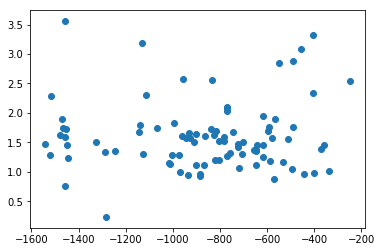

0.00216705389482


In [56]:
# free energies vs. activities

x_dat=[[free_energies[i]] for i in range(len(free_energies))]
x_dat=np.array(x_dat)

linreg.fit(x_dat,y_dat)
plt.scatter(x_dat,y_dat)
plt.show()
print(linreg.score(x_dat,y_dat))

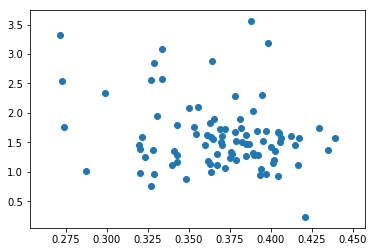

0.0569608664346


In [57]:
# GC content vs. activities

x_dat=[[GC_content[i]] for i in range(len(GC_content))]
x_dat=np.array(x_dat)

linreg.fit(x_dat,y_dat)
plt.scatter(x_dat,y_dat)
plt.show()
print(linreg.score(x_dat,y_dat))

In [58]:
# GC content (denaturation) and free energy vs. activities
x_dat=[]
x_dat.append(free_energies)
x_dat.append(GC_content)
x_dat=np.array(x_dat)
x_dat=x_dat.T

linreg.fit(x_dat,y_dat)
print(linreg.score(x_dat,y_dat))

svr.fit(x_dat,y_dat)
print(svr.score(x_dat,y_dat))

x_train, x_test, y_train, y_test = train_test_split(x_dat, y_dat)
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))

svr.predict(x_test)
svr.score(x_test,y_test)

0.0604999086623
0.738815867974
0.752435553048


-0.43211317762536949

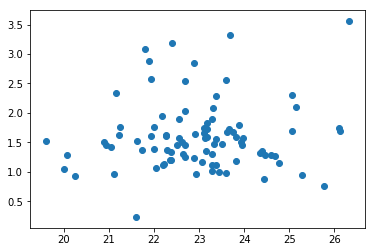

0.00875783924954


In [59]:
# MEME EPD motif1 scores vs. activities
x_dat=[[MEME_EPD_motif1_scores[i]] for i in range(len(MEME_EPD_motif1_scores))]
x_dat=np.array(x_dat)

linreg.fit(x_dat,y_dat)
plt.scatter(x_dat,y_dat)
plt.show()
print(linreg.score(x_dat,y_dat))

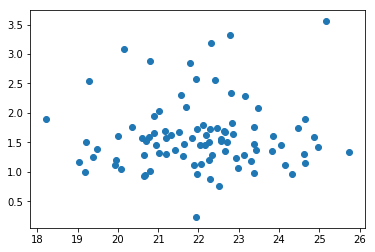

0.00138245642983


In [60]:
# MEME motif1 scores vs. activities
x_dat=[[MEME_motif1_scores[i]] for i in range(len(MEME_motif1_scores))]
x_dat=np.array(x_dat)


linreg.fit(x_dat,y_dat)
plt.scatter(x_dat,y_dat)
plt.show()
print(linreg.score(x_dat,y_dat))

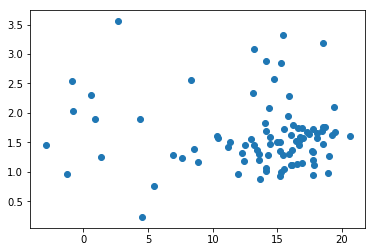

0.00428013519051


In [61]:
# ScerTF Rap1 scores vs. activites
x_dat=[[ScerTF_Rap1_scores[i]] for i in range(len(ScerTF_Rap1_scores))]
x_dat=np.array(x_dat)

linreg.fit(x_dat,y_dat)
plt.scatter(x_dat,y_dat)
plt.show()
print(linreg.score(x_dat,y_dat))

In [62]:
# all ScerTF RP motif scores vs.activities
## lin reg
x_dat=[]
x_dat.append(ScerTF_Rap1_scores)
x_dat.append(ScerTF_Abf1_scores)
x_dat.append(ScerTF_Fhl1_scores)
x_dat.append(ScerTF_Sfp1_scores)
x_dat.append(ScerTF_Reb1_scores)
x_dat=np.array(x_dat)
x_dat=x_dat.T

linreg.fit(x_dat,y_dat)
print(linreg.coef_)
print(linreg.score(x_dat,y_dat))

[ 0.00770995 -0.01161743  0.06200239  0.04925915 -0.0232481 ]
0.175189320587


In [72]:
print(x_dat)

[[  1.52492938e+01  -3.60527171e+00   3.02018931e+00   1.76503557e+01
    5.59354853e+00]
 [  1.43972465e+01   5.11779571e+00   3.75989029e+00   1.34557365e+01
    1.26409203e+01]
 [  1.52112187e+01   2.84818784e+00   4.08094334e+00   1.20622551e+01
    1.03189923e+01]
 [  1.35682914e+01   4.43010482e+00   4.28508406e+00   9.44511899e+00
    6.04100751e+00]
 [  1.80525983e+01   1.04253188e+01   8.38842381e+00   1.15150394e+01
    6.19078936e+00]
 [  1.92382328e+01   8.37131840e+00   5.96189067e+00   1.75396086e+01
    6.04100751e+00]
 [  8.53527008e+00   2.30359477e+00   5.06799589e+00   9.50393728e+00
   -5.58905335e-01]
 [  8.34002891e+00   4.11699300e+00   1.36766857e+01   1.24017196e+01
    3.71907941e+00]
 [  4.52916998e+00   1.15173549e+01   5.48564562e+00   1.01854251e+01
    1.51126303e+01]
 [  1.49781820e+01   6.28159144e+00   4.06644377e+00   1.25133181e+01
    3.71907941e+00]
 [  1.77461172e+01   3.29854612e+00   4.43863927e+00   1.14279698e+01
    6.19078936e+00]
 [  4.3892

In [71]:
print(y_dat.shape)
print(x_dat.shape)

(90,)
(90, 5)


In [63]:
## svr
svr.fit(x_dat,y_dat)
print(svr.score(x_dat,y_dat))

0.89555880273


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_dat, y_dat)
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))

svr.predict(x_test)
svr.score(x_test,y_test)

0.919380395276


-0.070578653915260192

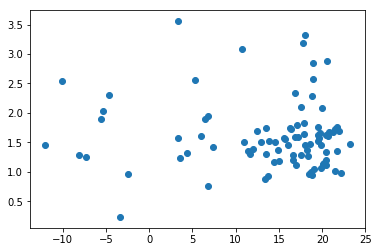

[-0.00379139]
0.00299445607597


In [62]:
# BioProsp motif1 scores vs. activites
x_dat=[[BioProsp_motif1_scores[i]] for i in range(len(BioProsp_motif1_scores))]
x_dat=np.array(x_dat)

linreg.fit(x_dat,y_dat)
plt.scatter(x_dat,y_dat)
plt.show()
print(linreg.coef_)
print(linreg.score(x_dat,y_dat))

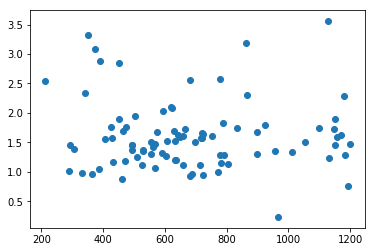

0.00164422273822


In [63]:
# promoter lengths vs. activites
x_dat=[[promoter_lengths[i]] for i in range(len(promoter_lengths))]
x_dat=np.array(x_dat)

linreg.fit(x_dat,y_dat)
plt.scatter(x_dat,y_dat)
plt.show()
print(linreg.score(x_dat,y_dat))

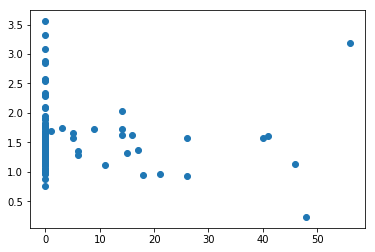

0.00668781126165
[-0.00403872]


In [101]:
x_dat=[[CpG_counts[i]] for i in range(len(CpG_counts))]
x_dat=np.array(x_dat)

linreg.fit(x_dat,y_dat)
plt.scatter(x_dat,y_dat)
plt.show()
print(linreg.score(x_dat,y_dat))
print(linreg.coef_)

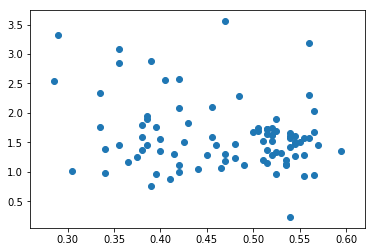

[-1.69514283]
0.0516651441373


In [65]:
x_dat=[[GC_max_freqs[i]] for i in range(len(GC_max_freqs))]
x_dat=np.array(x_dat)

linreg.fit(x_dat,y_dat)
plt.scatter(x_dat,y_dat)
plt.show()
print(linreg.coef_)
print(linreg.score(x_dat,y_dat))

In [66]:
np.mean(y_dat)

1.6010000000000004

In [67]:
linreg.predict(x_dat)

array([ 1.79236279,  1.74998422,  1.45333422,  1.52961565,  1.47876137,
        1.51266422,  1.81778993,  1.70760565,  1.47876137,  1.46180994,
        1.52113994,  1.74150851,  1.58046994,  1.47876137,  1.72455708,
        1.68217851,  1.51266422,  1.51266422,  1.82626565,  1.71608136,
        1.69912993,  1.4363828 ,  1.44485851,  1.51266422,  1.59742137,
        1.48723708,  1.59742137,  1.50418851,  1.50418851,  1.52113994,
        1.47876137,  1.45333422,  1.63132422,  1.81778993,  1.45333422,
        1.66522708,  1.4363828 ,  1.48723708,  1.67370279,  1.64827565,
        1.62284851,  1.47028565,  1.74150851,  1.62284851,  1.91102279,
        1.73303279,  1.74150851,  1.38552851,  1.74998422,  1.73303279,
        1.90254707,  1.58046994,  1.68217851,  1.75845993,  1.72455708,
        1.44485851,  1.48723708,  1.52113994,  1.4957128 ,  1.59742137,
        1.74998422,  1.82626565,  1.61437279,  1.79236279,  1.47876137,
        1.52961565,  1.50418851,  1.47028565,  1.68217851,  1.71

In [68]:
# motif positions vs. activities
## svr
x_dat=np.array(all_motif_pos)
x_train, x_test, y_train, y_test = train_test_split(x_dat, y_dat)
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))

svr.predict(x_test)
svr.score(x_test,y_test)

0.901420475758


-0.014677246203503859

In [69]:
## lin reg
x_dat=np.array(all_motif_pos)

linreg.fit(x_dat,y_dat)
print(linreg.coef_)
print(linreg.score(x_dat,y_dat))

[ -4.06450618e-05  -5.23004836e-05   4.19201358e-05   2.01216203e-04
   2.12076446e-04]
0.0145035817796


In [70]:
x_dat=np.array(all_motif_pos)
x_train, x_test, y_train, y_test = train_test_split(x_dat, y_dat)

linreg.fit(x_train,y_train)
print(linreg.score(x_train,y_train))

linreg.predict(x_test)
linreg.score(x_test,y_test)

0.0232279393476


-0.025051122635719958

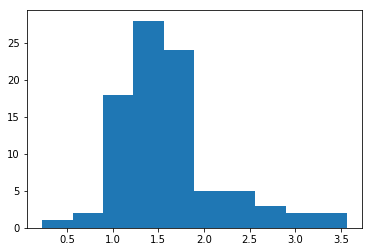

In [71]:
plt.hist(training_activities)
plt.show()

In [72]:
training_act_med=stat.median(training_activities)
print(training_act_med)

1.505


In [73]:
seq_act=[]
for i in range(0, len(training_activities)):
    seq_act.append((training_seqs[i],training_activities[i]))

In [74]:
# 1=high expression, 0=low expression
seq_class=[]
for i in range(0,len(seq_act)):
    if (seq_act[i][1]>=training_act_med):
        seq_class.append((seq_act[i][0],1))
    else:
        seq_class.append((seq_act[i][0],0))

In [75]:
x_dat=[]
x_dat.append(ScerTF_Rap1_scores)
x_dat.append(ScerTF_Abf1_scores)
x_dat.append(ScerTF_Fhl1_scores)
x_dat.append(ScerTF_Sfp1_scores)
x_dat.append(ScerTF_Reb1_scores)
x_dat.append(GC_max_freqs)
x_dat=np.array(x_dat)
x_dat=x_dat.T

y_dat=[seq_class[i][1] for i in range(0,len(seq_class))]


In [73]:
y_dat

array([ 2.84,  1.59,  0.92,  1.2 ,  1.66,  1.62,  1.39,  2.56,  0.23,
        1.5 ,  1.73,  1.9 ,  1.24,  1.42,  0.96,  0.99,  1.53,  1.63,
        1.76,  1.36,  0.87,  1.67,  2.3 ,  1.75,  1.31,  1.11,  3.56,
        1.89,  1.69,  1.73,  1.61,  1.28,  1.28,  0.98,  1.58,  1.83,
        2.04,  1.2 ,  1.51,  1.04,  2.1 ,  1.6 ,  1.45,  1.59,  2.55,
        0.76,  1.95,  1.35,  1.8 ,  2.89,  3.32,  1.48,  2.58,  1.25,
        1.76,  1.58,  1.13,  1.37,  1.32,  1.19,  1.37,  2.34,  1.45,
        3.09,  1.58,  1.52,  1.33,  1.48,  1.12,  1.55,  1.26,  1.31,
        2.09,  1.01,  1.68,  1.45,  1.7 ,  1.64,  0.97,  1.16,  1.5 ,
        1.45,  2.28,  1.75,  1.15,  0.94,  1.12,  1.28,  1.06,  3.18])

In [76]:
logreg= linear_model.LogisticRegression()
logreg.fit(x_dat,y_dat)
logreg.coef_
logreg.score(x_dat,y_dat)

0.6333333333333333

In [77]:
sum(y_dat)/len(y_dat)

0.5

In [78]:
from sklearn.svm import SVC

svclf = SVC(kernel="rbf")
svclf.fit(x_dat,y_dat)
svclf.score(x_dat,y_dat)

1.0

In [79]:
from sklearn.model_selection import cross_validate
svclf = SVC(kernel="rbf")

cross_validate(svclf,x_dat,y_dat,cv=5)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([ 0.00059295,  0.00055099,  0.000494  ,  0.00086188,  0.00093174]),
 'score_time': array([ 0.00026798,  0.00024199,  0.00023389,  0.00163031,  0.00044513]),
 'test_score': array([ 0.72222222,  0.55555556,  0.5       ,  0.44444444,  0.55555556]),
 'train_score': array([ 1.,  1.,  1.,  1.,  1.])}

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_dat, y_dat)

knn=KNeighborsClassifier()
cross_validate(knn,x_dat,y_dat,cv=5)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([ 0.00178981,  0.00037694,  0.00039124,  0.00029588,  0.00028992]),
 'score_time': array([ 0.00068212,  0.00082898,  0.00054979,  0.00048995,  0.00050092]),
 'test_score': array([ 0.55555556,  0.61111111,  0.5       ,  0.38888889,  0.61111111]),
 'train_score': array([ 0.79166667,  0.72222222,  0.72222222,  0.73611111,  0.70833333])}

In [81]:
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.43478260869565216

In [82]:
from sklearn.decomposition import PCA

pc2 = PCA(3)
pc_test = x_dat.copy()

In [83]:
pc_test = pc2.fit_transform(pc_test)

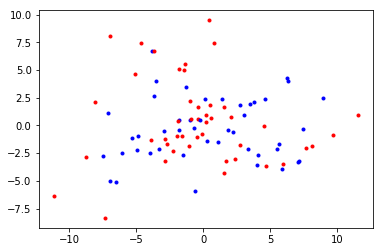

In [84]:
cols = ["red","blue"]
for i in range(len(pc_test)):
    plt.plot(pc_test[i][1],pc_test[i][2],".", color = cols[y_dat[i]])
plt.show()

In [85]:
pc_test[0][1]

6.3437502802507586

In [123]:
print(y_dat.tolist())

[2.84, 1.59, 0.92, 1.2, 1.66, 1.62, 1.39, 2.56, 0.23, 1.5, 1.73, 1.9, 1.24, 1.42, 0.96, 0.99, 1.53, 1.63, 1.76, 1.36, 0.87, 1.67, 2.3, 1.75, 1.31, 1.11, 3.56, 1.89, 1.69, 1.73, 1.61, 1.28, 1.28, 0.98, 1.58, 1.83, 2.04, 1.2, 1.51, 1.04, 2.1, 1.6, 1.45, 1.59, 2.55, 0.76, 1.95, 1.35, 1.8, 2.89, 3.32, 1.48, 2.58, 1.25, 1.76, 1.58, 1.13, 1.37, 1.32, 1.19, 1.37, 2.34, 1.45, 3.09, 1.58, 1.52, 1.33, 1.48, 1.12, 1.55, 1.26, 1.31, 2.09, 1.01, 1.68, 1.45, 1.7, 1.64, 0.97, 1.16, 1.5, 1.45, 2.28, 1.75, 1.15, 0.94, 1.12, 1.28, 1.06, 3.18]


In [127]:
# giant feature-output matrix
# include BioProsp/MEME EPD motif scores?

features = []
features.append(ScerTF_Rap1_scores)
features.append(ScerTF_Abf1_scores)
features.append(ScerTF_Fhl1_scores)
features.append(ScerTF_Sfp1_scores)
features.append(BioProsp_motif1_scores)
features.append(BioProsp_motif2_scores)
features.append(BioProsp_motif3_scores)
features.append(BioProsp_motif4_scores)
features.append(BioProsp_motif5_scores)
features.append(MEME_motif1_scores)
features.append(MEME_motif2_scores)
features.append(MEME_motif3_scores)
features.append(MEME_motif4_scores)
features.append(MEME_motif5_scores)
features.append(CpG_counts)
features.append(obs2exp_max)
features.append(GC_max_freqs)
features.append(GC_content)
features.append(free_energies)
y_dat_feat=y_dat.tolist()
features.append(y_dat_feat)

features=np.array(features)
features=features.T
features=features.tolist()




In [128]:
with open('features.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(features)

csvFile.close()

In [111]:
print(features)
len(features[0])

[[15.249293832662687, 14.397246514264403, 15.211218743153497, 13.568291397656198, 18.052598342876955, 19.238232785307154, 8.535270076232159, 8.340028907867442, 4.529169976364209, 14.978181956102006, 17.746117173170642, 4.389271839678113, 7.659754021324517, 11.207148957576264, -1.2886898412509602, 15.315369507209995, 16.441489625012743, 16.03367752092645, 18.523377240079924, 17.690784097423148, 13.669557196354877, 17.313676627630354, 0.5578721703545497, 16.613724632605457, 13.554474474561118, 16.03367752092645, 2.704419823207413, 0.9250791829168854, 14.084492921795654, 15.485776109398449, 10.35581204814868, 6.959504406278299, 14.237998170452542, 18.893413263938164, 16.951800513872044, 14.047269561494625, -0.8060355638977263, 17.746117173170642, 11.324220215179837, 15.501761320361624, 19.379095711343467, 20.588796323793037, 12.4726903565876, 16.772286396063222, -0.8782147738511377, 5.426575601919943, 15.835956854881909, 15.215847411535503, 16.22368831152341, 14.09076534455809, 15.4474632

90

In [156]:
from sklearn.model_selection import cross_validate
max_scores=[]
x_dat=[]
x_dat.append(GC_content)
x_dat.append(obs2exp_max)
x_dat.append(ScerTF_Fhl1_scores)
x_dat.append(ScerTF_Sfp1_scores)
x_dat=np.array(x_dat)
x_dat=x_dat.T

y_dat=np.array(training_activities)
max_score=max(cross_validate(linreg,x_dat,y_dat,cv=5)['test_score'])
print(max_score)
max_scores.append(max_score)

0.090262213964


In [157]:
svr=SVR(kernel = "poly",degree=2)
#scores=cross_validate(svr,x_dat,y_dat,cv=5)['test_score']
max_score=max(cross_validate(svr,x_dat,y_dat,cv=5)['test_score'].tolist())
print(max_score)
max_scores.append(max_score)
#cross_validate(svr,x_dat,y_dat,cv=5)

0.21575872139774


In [158]:
y_dat=[seq_class[i][1] for i in range(0,len(seq_class))]
max_score=max(cross_validate(logreg,x_dat,y_dat,cv=5)['test_score'])
print(max_score)
max_scores.append(max_score)

0.611111111111


In [159]:
svclf = SVC(kernel="poly",degree=2)
max_score=max(cross_validate(svclf,x_dat,y_dat,cv=5)['test_score'])
print(max_score)
max_scores.append(max_score)

0.666666666667


In [164]:
print(max_scores)
type(max_scores[0])

[0.090262213964015361, 0.21575872139774, 0.61111111111111116, 0.66666666666666663]


numpy.float64

In [167]:
with open('max_scores.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows([max_scores])

csvFile.close()